In [1]:
!pwd

/home/ashesh.ashesh/code/DiffSplitting/notebooks


In [2]:
import sys
sys.path.append('..')

from data.split_dataset import SplitDataset, DataLocation

data_location = DataLocation(directory='/group/jug/ashesh/data/diffsplit_nicola/500ms/Ch_B-Ch_D-Ch_BD/train')
patch_size = 256
data_type = 'HT_LMF'
uncorrelated_channels = False
dataset = SplitDataset(data_type, data_location, patch_size, 
                            max_qval=0.98, upper_clip=True,
                            input_channel_idx=2,
                            normalization_dict=None, enable_transforms=True,
                            uncorrelated_channels=False, random_patching=True,
                            )
print(len(dataset))

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.21 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations


Computing mean and std for normalization
Clipping data to 0.98 quantile
[SplitDataset] Data: 90x3x(1608, 1608) Patch:256 Random:1 Aug:True Q:0.98 UpperClip:1Uncor:False
3240


In [3]:
data_dict = dataset[2]
data_dict.keys()

dict_keys(['target', 'real_input', 'synthetic_input'])

In [5]:
data_dict['real_input'].shape

(1, 256, 256)

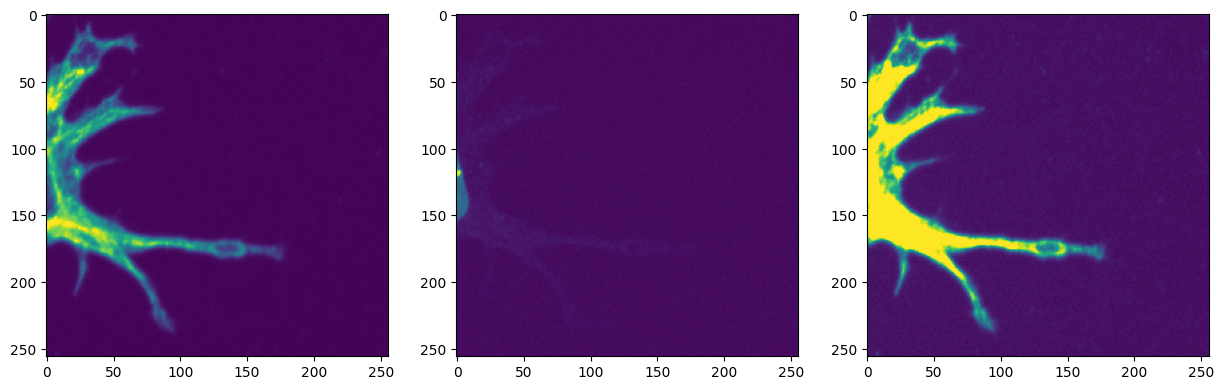

In [6]:
import matplotlib.pyplot as plt

_,ax = plt.subplots(figsize=(15,5),ncols=3)
ax[0].imshow((data_dict['target'][0]+1)/2)
ax[1].imshow((1+data_dict['target'][1])/2)
ax[2].imshow((1+data_dict['real_input'][0])/2)

In [7]:
dataset.get_normalization_dict()

{'mean_input': 1766.0,
 'std_input': 1766.0,
 'mean_target': array([[[1274. ]],
 
        [[ 673.5]],
 
        [[2956.5]]]),
 'std_target': array([[[1274. ]],
 
        [[ 673.5]],
 
        [[2956.5]]]),
 'target0_max': 2548.0,
 'target1_max': 1347.0,
 'input_max': 3532.0}

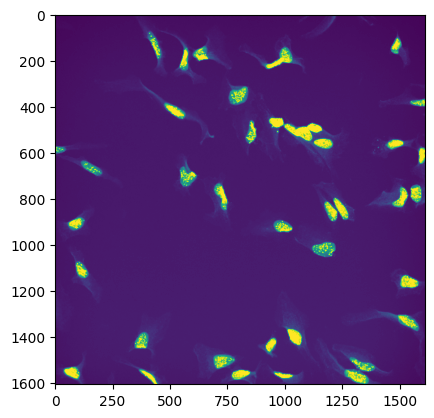

In [16]:
plt.imshow(dataset._data_dict[1][0])

In [12]:
dataset._data_dict[2][0].min()

266.0